In [1]:
import pandas as pd
import numpy as np

# <span style= 'color:lightgreen'>Merge</span>

In [3]:
dframe = pd.DataFrame({'key':['X','Z','Y','Z','X','X'], 
                       'data_set_1':np.arange(6)})

In [4]:
dframe

,key,data_set_1
0,X,0
1,Z,1
2,Y,2
3,Z,3
4,X,4
5,X,5


In [5]:
dframe_ = pd.DataFrame({'key':['Q','Y','Z'], 
                       'data_set_2':[1,2,3]})

In [6]:
dframe_

,key,data_set_2
0,Q,1
1,Y,2
2,Z,3


In [7]:
pd.merge(dframe,dframe_)

,key,data_set_1,data_set_2
0,Z,1,3
1,Z,3,3
2,Y,2,2


In [8]:
pd.merge(dframe,dframe_,on='key')

,key,data_set_1,data_set_2
0,Z,1,3
1,Z,3,3
2,Y,2,2


In [9]:
pd.merge(dframe,dframe_,on='key', how='left')

,key,data_set_1,data_set_2
0,X,0,NaN
1,Z,1,3.0
2,Y,2,2.0
3,Z,3,3.0
4,X,4,NaN
5,X,5,NaN


In [10]:
pd.merge(dframe,dframe_,on='key', how='right')

,key,data_set_1,data_set_2
0,Z,1.0,3
1,Z,3.0,3
2,Y,2.0,2
3,Q,NaN,1


In [11]:
pd.merge(dframe,dframe_,on='key', how='outer')

,key,data_set_1,data_set_2
0,X,0.0,NaN
1,X,4.0,NaN
2,X,5.0,NaN
3,Z,1.0,3.0
4,Z,3.0,3.0
5,Y,2.0,2.0
6,Q,NaN,1.0


In [12]:
dframe1 = pd.DataFrame({'key':['X','X','X','Y','Z','Z'], 
                       'data_set_3': range(6)})

In [13]:
dframe1

,key,data_set_3
0,X,0
1,X,1
2,X,2
3,Y,3
4,Z,4
5,Z,5


In [14]:
dframe2 = pd.DataFrame({'key':['Y','Y','X','X','Z'],
                       'data_set_4':range(5)})

In [15]:
dframe2

,key,data_set_4
0,Y,0
1,Y,1
2,X,2
3,X,3
4,Z,4


In [16]:
pd.merge(dframe1,dframe2)

,key,data_set_3,data_set_4
0,X,0,2
1,X,0,3
2,X,1,2
3,X,1,3
4,X,2,2
5,X,2,3
6,Y,3,0
7,Y,3,1
8,Z,4,4
9,Z,5,4


In [17]:
df_left = pd.DataFrame({'key1':['SF','SF','LA'], 
                        'key2':['one','two','one'],
                       'left_data':[10,20,30]})

In [18]:
df_left

,key1,key2,left_data
0,SF,one,10
1,SF,two,20
2,LA,one,30


In [19]:
df_right = pd.DataFrame({'key1':['SF','SF','LA','LA'],
                        'key2':['one','one','one','two'],
                        'right_data':[40,50,60,70]})

In [20]:
df_right

,key1,key2,right_data
0,SF,one,40
1,SF,one,50
2,LA,one,60
3,LA,two,70


In [22]:
pd.merge(df_right, df_left, on=['key1','key2'], how='outer')

,key1,key2,right_data,left_data
0,SF,one,40.0,10.0
1,SF,one,50.0,10.0
2,LA,one,60.0,30.0
3,LA,two,70.0,NaN
4,SF,two,NaN,20.0


In [23]:
pd.merge(df_right, df_left, on='key1')

,key1,key2_x,right_data,key2_y,left_data
0,SF,one,40,one,10
1,SF,one,40,two,20
2,SF,one,50,one,10
3,SF,one,50,two,20
4,LA,one,60,one,30
5,LA,two,70,one,30


In [24]:
pd.merge(df_right,df_left, on='key1', suffixes=('_lefty','_righty'))

,key1,key2_lefty,right_data,key2_righty,left_data
0,SF,one,40,one,10
1,SF,one,40,two,20
2,SF,one,50,one,10
3,SF,one,50,two,20
4,LA,one,60,one,30
5,LA,two,70,one,30


# <span style= 'color:lightgreen'>Merge on Index</span>

In [35]:
df_left_ = pd.DataFrame({'key':['X','Y','Z','X','Y'],
                        'data':range(5)})

In [36]:
df_left_

,key,data
0,X,0
1,Y,1
2,Z,2
3,X,3
4,Y,4


In [37]:
df_right_ = pd.DataFrame({'group_data':[10,20]},
                         index=['X','Y'])

In [38]:
df_right_

,group_data
X,10
Y,20


In [44]:
pd.merge(df_left_,df_right_,left_on='key' ,right_index=True)

,key,data,group_data
0,X,0,10
3,X,3,10
1,Y,1,20
4,Y,4,20


In [47]:
df_left_hr = pd.DataFrame({'key1':['SF','SF','SF','LA','LA'],
                          'key2':[10,20,30,20,30],
                          'data_set':np.arange(5.)})

In [48]:
df_left_hr

,key1,key2,data_set
0,SF,10,0.0
1,SF,20,1.0
2,SF,30,2.0
3,LA,20,3.0
4,LA,30,4.0


In [50]:
df_right_hr = pd.DataFrame(np.arange(10).reshape(5,2),
                       index=[['LA','LA','SF','SF','SF'],
                             [20,10,10,10,20]],
                       columns=['col_1','col_2'])

In [51]:
df_right_hr

col_1  col_2
LA 20      0      1
   10      2      3
SF 10      4      5
   10      6      7
   20      8      9

In [52]:
pd.merge(df_left_hr,df_right_hr, left_on=['key1','key2'],
         right_index=True)

,key1,key2,data_set,col_1,col_2
0,SF,10,0.0,4,5
0,SF,10,0.0,6,7
1,SF,20,1.0,8,9
3,LA,20,3.0,0,1


In [53]:
df_left_.join(df_right_)

,key,data,group_data
0,X,0,NaN
1,Y,1,NaN
2,Z,2,NaN
3,X,3,NaN
4,Y,4,NaN


# <span style= 'color:lightgreen'>Concatenate</span>

In [54]:
arr1 = np.arange(9).reshape(3,3)

In [55]:
arr1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [57]:
np.concatenate([arr1,arr1], axis=1)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [60]:
np.concatenate([arr1,arr1], axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [62]:
ser1 = pd.Series([0,1,2], index=['T','U','V'])
ser2 = pd.Series([3,4], index=['X','Y'])

In [63]:
ser1

T    0
U    1
V    2
dtype: int64

In [64]:
ser2

X    3
Y    4
dtype: int64

In [65]:
pd.concat([ser1,ser2])

T    0
U    1
V    2
X    3
Y    4
dtype: int64

In [67]:
pd.concat([ser1,ser2], axis=1, sort=True)

,0,1
T,0.0,NaN
U,1.0,NaN
V,2.0,NaN
X,NaN,3.0
Y,NaN,4.0


In [68]:
pd.concat([ser1,ser2], keys=['cat1','cat2'])

cat1  T    0
      U    1
      V    2
cat2  X    3
      Y    4
dtype: int64

In [69]:
dframe3 = pd.DataFrame(np.random.randn(4,3), columns=['X','Y','Z'])
dframe4 = pd.DataFrame(np.random.randn(3,3), columns=['Y','Q','X'])

In [70]:
dframe3

,X,Y,Z
0,0.075962,0.252255,0.673133
1,-1.422693,-1.679623,1.865902
2,-1.849756,-1.753150,-0.650704
3,0.619166,0.863036,1.457303


In [71]:
dframe4

,Y,Q,X
0,-1.894732,-0.176885,0.601606
1,1.483130,0.935022,1.493531
2,-0.460578,-1.354306,-2.020236


In [73]:
pd.concat([dframe3,dframe4], sort=True)

,Q,X,Y,Z
0,NaN,0.075962,0.252255,0.673133
1,NaN,-1.422693,-1.679623,1.865902
2,NaN,-1.849756,-1.753150,-0.650704
3,NaN,0.619166,0.863036,1.457303
0,-0.176885,0.601606,-1.894732,NaN
1,0.935022,1.493531,1.483130,NaN
2,-1.354306,-2.020236,-0.460578,NaN


In [75]:
pd.concat([dframe1,dframe2],ignore_index=True, sort=True)

,data_set_3,data_set_4,key
0,0.0,NaN,X
1,1.0,NaN,X
2,2.0,NaN,X
3,3.0,NaN,Y
4,4.0,NaN,Z
5,5.0,NaN,Z
6,NaN,0.0,Y
7,NaN,1.0,Y
8,NaN,2.0,X
9,NaN,3.0,X


# <span style= 'color:lightgreen'>Combining Df</span>

In [77]:
ser1 = pd.Series([2,np.nan,4,np.nan,6,np.nan],
                index=['Q','R','S','T','U','V'])

In [78]:
ser1

Q    2.0
R    NaN
S    4.0
T    NaN
U    6.0
V    NaN
dtype: float64

In [80]:
ser2 = pd.Series(np.arange(len(ser1)), dtype=np.float64,
                 index=['Q','R','S','T','U','V'])

In [81]:
ser2

Q    0.0
R    1.0
S    2.0
T    3.0
U    4.0
V    5.0
dtype: float64

In [85]:
pd.Series(np.where(pd.isnull(ser1),ser2,ser1),
                  index=ser1.index)

Q    2.0
R    1.0
S    4.0
T    3.0
U    6.0
V    5.0
dtype: float64

In [86]:
ser1.combine_first(ser2)

Q    2.0
R    1.0
S    4.0
T    3.0
U    6.0
V    5.0
dtype: float64

In [88]:
dframe_odds = pd.DataFrame({'X':[1.,np.nan,3.,np.nan,],
                           'Y':[np.nan,5.,np.nan,7.],
                           'Z':[np.nan,9.,np.nan,11]})

In [89]:
dframe_odds

,X,Y,Z
0,1.0,NaN,NaN
1,NaN,5.0,9.0
2,3.0,NaN,NaN
3,NaN,7.0,11.0


In [91]:
dframe_evens = pd.DataFrame({'X':[2.,4.,np.nan,6.,8.],
                            'Y':[np.nan,10.,12.,14.,16.]})

In [92]:
dframe_evens

,X,Y
0,2.0,NaN
1,4.0,10.0
2,NaN,12.0
3,6.0,14.0
4,8.0,16.0


In [93]:
dframe_odds.combine_first(dframe_evens)

,X,Y,Z
0,1.0,NaN,NaN
1,4.0,5.0,9.0
2,3.0,12.0,NaN
3,6.0,7.0,11.0
4,8.0,16.0,NaN


# <span style= 'color:lightgreen'>Reshaping</span>

In [95]:
dframe5 = pd.DataFrame(np.arange(8).reshape(2,4),
                      index=pd.Index(['LA','SF'],name='city'),
                      columns=pd.Index(['A','B','C','D'], name='letter'))

In [96]:
dframe5

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [97]:
dframe_st = dframe5.stack()

In [100]:
dframe_st

city  letter
LA    A         0
      B         1
      C         2
      D         3
SF    A         4
      B         5
      C         6
      D         7
dtype: int64

In [101]:
dframe_st.unstack()

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [103]:
dframe_st.unstack('city')

city,LA,SF
letter,,
A,0,4
B,1,5
C,2,6
D,3,7


In [104]:
ser1 = pd.Series([0,1,2],index=['Q','X','Y'])
ser2 = pd.Series([4,5,6],index=['X','Y','Z'])

In [105]:
dframe6 = pd.concat([ser1,ser2], keys=['Alpha','Beta'])

In [106]:
dframe6

Alpha  Q    0
       X    1
       Y    2
Beta   X    4
       Y    5
       Z    6
dtype: int64

In [107]:
dframe6.unstack()

,Q,X,Y,Z
Alpha,0.0,1.0,2.0,NaN
Beta,NaN,4.0,5.0,6.0


In [108]:
dframe6.unstack().stack()

Alpha  Q    0.0
       X    1.0
       Y    2.0
Beta   X    4.0
       Y    5.0
       Z    6.0
dtype: float64

In [109]:
dframe6.unstack().stack(dropna=False)

Alpha  Q    0.0
       X    1.0
       Y    2.0
       Z    NaN
Beta   Q    NaN
       X    4.0
       Y    5.0
       Z    6.0
dtype: float64

# <span style= 'color:lightgreen'>Pivoting</span>

In [114]:
import pandas.util.testing as tm; tm.N =3

def unpivot(frame):
    
    N,K = frame.shape
    
    data = {'value': frame.values.ravel('F'),
           'variable': np.asarray(frame.columns).repeat(N),
           'date': np.tile(np.asarray(frame.index),K)}
    
    return pd.DataFrame(data, columns=['date','variable','value'])

dframe = unpivot(tm.makeTimeDataFrame())

In [115]:
dframe

,date,variable,value
0,2000-01-03,A,-2.252899
1,2000-01-04,A,-0.183135
2,2000-01-05,A,-1.020373
3,2000-01-03,B,1.236359
4,2000-01-04,B,1.675220
5,2000-01-05,B,-0.881207
6,2000-01-03,C,-1.303780
7,2000-01-04,C,0.700508
8,2000-01-05,C,-0.386321
9,2000-01-03,D,1.060265


In [117]:
dframe_piv = dframe.pivot('date','variable','value')

In [118]:
dframe_piv

variable,A,B,C,D
date,,,,
2000-01-03,-2.252899,1.236359,-1.303780,1.060265
2000-01-04,-0.183135,1.675220,0.700508,-1.149301
2000-01-05,-1.020373,-0.881207,-0.386321,-0.831306


# <span style= 'color:lightgreen'>Duplicates in df</span>

In [120]:
dframe7 = pd.DataFrame({'key1':['A']*2 + ['B']*3,
                       'key2':[2,2,2,3,3]})

In [121]:
dframe7

,key1,key2
0,A,2
1,A,2
2,B,2
3,B,3
4,B,3


In [124]:
dframe7.duplicated().value_counts()

False    3
True     2
dtype: int64

In [123]:
dframe7.drop_duplicates()

,key1,key2
0,A,2
2,B,2
3,B,3


In [125]:
dframe7.drop_duplicates(['key1'])

,key1,key2
0,A,2
2,B,2


In [128]:
dframe7.drop_duplicates(['key1'],keep='last')

,key1,key2
1,A,2
4,B,3


# <span style= 'color:lightgreen'>Mapping</span>

In [130]:
dframe8 = pd.DataFrame({'city':['Alma','Brian Head','Fox Park'],
                       'altitude':[3158,3000,2762]})

In [131]:
dframe8

,city,altitude
0,Alma,3158
1,Brian Head,3000
2,Fox Park,2762


In [132]:
state_map = {'Alma':'Colorado','Brian Head':'Utah','Fox Park':'Wyoming'}

In [134]:
dframe8['state'] = dframe8['city'].map(state_map)

In [135]:
dframe8

,city,altitude,state
0,Alma,3158,Colorado
1,Brian Head,3000,Utah
2,Fox Park,2762,Wyoming


# <span style= 'color:lightgreen'>Replace</span>

In [137]:
ser2 = pd.Series([1,2,3,4,1,2,3,4])

In [138]:
ser2

0    1
1    2
2    3
3    4
4    1
5    2
6    3
7    4
dtype: int64

In [139]:
ser2.replace(1,np.nan)

0    NaN
1    2.0
2    3.0
3    4.0
4    NaN
5    2.0
6    3.0
7    4.0
dtype: float64

In [140]:
ser2.replace([1,4],[100,400])

0    100
1      2
2      3
3    400
4    100
5      2
6      3
7    400
dtype: int64

In [141]:
ser2.replace({4:np.nan})

0    1.0
1    2.0
2    3.0
3    NaN
4    1.0
5    2.0
6    3.0
7    NaN
dtype: float64

# <span style= 'color:lightgreen'>Rename Index</span>

In [142]:
dframe9 = pd.DataFrame(np.arange(12).reshape(3,4),
                      index = ['NY','LA','SF'],
                      columns=['A','B','C','D'])

In [143]:
dframe9

,A,B,C,D
NY,0,1,2,3
LA,4,5,6,7
SF,8,9,10,11


In [144]:
dframe9.index.map(str.lower)

Index(['ny', 'la', 'sf'], dtype='object')

In [145]:
dframe9.index = dframe9.index.map(str.lower)

In [146]:
dframe9

,A,B,C,D
ny,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [147]:
dframe9.rename(index=str.title,columns=str.lower)

,a,b,c,d
Ny,0,1,2,3
La,4,5,6,7
Sf,8,9,10,11


In [148]:
dframe9.rename(index={'ny':'NEW YORK'},
              columns={'A':'Alpha'})

,Alpha,B,C,D
NEW YORK,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [150]:
dframe9.rename(index={'ny':'NEW YORK'},inplace=True)

In [151]:
dframe9

,A,B,C,D
NEW YORK,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


# <span style= 'color:lightgreen'>Binning</span>

In [152]:
years = [1990,1991,1992,2008,2012,2015,1987,1969,2013,2008,1999]

In [153]:
decade_bins = [1960,1970,1980,1990,2000,2010,2020]

In [154]:
decade_cat = pd.cut(years,decade_bins)

In [156]:
decade_cat.categories

IntervalIndex([(1960, 1970], (1970, 1980], (1980, 1990], (1990, 2000], (2000, 2010], (2010, 2020]]
              closed='right',
              dtype='interval[int64]')

In [157]:
pd.value_counts(decade_cat)

(2010, 2020]    3
(1990, 2000]    3
(2000, 2010]    2
(1980, 1990]    2
(1960, 1970]    1
(1970, 1980]    0
dtype: int64

In [158]:
pd.cut(years,2,precision=1)

[(1969.0, 1992.0], (1969.0, 1992.0], (1969.0, 1992.0], (1992.0, 2015.0], (1992.0, 2015.0], ..., (1969.0, 1992.0], (1969.0, 1992.0], (1992.0, 2015.0], (1992.0, 2015.0], (1992.0, 2015.0]]
Length: 11
Categories (2, interval[float64]): [(1969.0, 1992.0] < (1992.0, 2015.0]]

# <span style= 'color:lightgreen'>Outliers</span>

In [159]:
np.random.seed(12345)

In [160]:
dframe10 = pd.DataFrame(np.random.randn(1000,4))

In [162]:
dframe10.head()

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


In [163]:
dframe10.tail()

,0,1,2,3
995,1.089085,0.251232,-1.451985,1.653126
996,-0.478509,-0.010663,-1.060881,-1.502870
997,-1.946267,1.013592,0.037333,0.133304
998,-1.293122,-0.322542,-0.782960,-0.303340
999,0.089987,0.292291,1.177706,0.882755


In [164]:
dframe10.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [166]:
dframe10[0].head()

0   -0.204708
1    1.965781
2    0.769023
3    0.274992
4   -2.001637
Name: 0, dtype: float64

In [169]:
dframe10[0][np.abs(dframe10[0])>3]

523   -3.428254
900    3.366626
Name: 0, dtype: float64

In [171]:
dframe10[(np.abs(dframe10)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [172]:
dframe10[np.abs(dframe10)>3] = np.sign(dframe10)*3

In [173]:
dframe10.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


# <span style= 'color:lightgreen'>Permutation</span>

In [174]:
dframe11 = pd.DataFrame(np.arange(16).reshape(4,4))

In [175]:
blender = np.random.permutation(4)

In [176]:
blender

array([1, 3, 2, 0])

In [177]:
dframe11

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [179]:
dframe11.take(blender)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
2,8,9,10,11
0,0,1,2,3


In [180]:
box = np.array([1,2,3])

In [181]:
shaker = np.random.randint(0,len(box),size=10)

In [182]:
shaker

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 2])

In [183]:
hand_grabs = box.take(shaker)

In [184]:
hand_grabs

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 3])

# <span style= 'color:lightgreen'>Groupby on dictionaries</span>

In [186]:
dframe12 = pd.DataFrame({'k1':['X','X','Y','Y','Z'],
                        'k2':['alpha','beta','alpha','beta','alpha'],
                        'dataset1':np.random.randn(5),
                        'dataset2':np.random.randn(5)})

In [187]:
dframe12

,k1,k2,dataset1,dataset2
0,X,alpha,0.779515,0.159703
1,X,beta,-2.453088,0.101103
2,Y,alpha,0.689468,-0.087746
3,Y,beta,0.280517,-0.658604
4,Z,alpha,1.622469,0.497419


In [188]:
group1 = dframe12['dataset1'].groupby(dframe12['k1'])

In [190]:
group1.mean()

k1
X   -0.836786
Y    0.484992
Z    1.622469
Name: dataset1, dtype: float64

In [191]:
cities = np.array(['NY','LA','LA','NY','NY'])

month = np.array(['JAN','FEB','JAN','FEB','JAN'])

In [192]:
dframe12['dataset1'].groupby([cities,month]).mean()

LA  FEB   -2.453088
    JAN    0.689468
NY  FEB    0.280517
    JAN    1.200992
Name: dataset1, dtype: float64

In [193]:
dframe12.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,-0.836786,0.130403
Y,0.484992,-0.373175
Z,1.622469,0.497419


In [194]:
dframe12.groupby(['k1','k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha  0.779515  0.159703
   beta  -2.453088  0.101103
Y  alpha  0.689468 -0.087746
   beta   0.280517 -0.658604
Z  alpha  1.622469  0.497419

In [195]:
dframe12.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

In [198]:
for name, group in dframe12.groupby('k1'):
    print ('This is the %s group' %name)
    print (group)
    print ('\n')

This is the X group
  k1     k2  dataset1  dataset2
0  X  alpha  0.779515  0.159703
1  X   beta -2.453088  0.101103


This is the Y group
  k1     k2  dataset1  dataset2
2  Y  alpha  0.689468 -0.087746
3  Y   beta  0.280517 -0.658604


This is the Z group
  k1     k2  dataset1  dataset2
4  Z  alpha  1.622469  0.497419




In [199]:
for (k1,k2), group in dframe12.groupby(['k1','k2']):
    print('Key1 = %s Key2 %s' %(k1,k2))
    print(group)
    print('\n')

Key1 = X Key2 alpha
  k1     k2  dataset1  dataset2
0  X  alpha  0.779515  0.159703


Key1 = X Key2 beta
  k1    k2  dataset1  dataset2
1  X  beta -2.453088  0.101103


Key1 = Y Key2 alpha
  k1     k2  dataset1  dataset2
2  Y  alpha  0.689468 -0.087746


Key1 = Y Key2 beta
  k1    k2  dataset1  dataset2
3  Y  beta  0.280517 -0.658604


Key1 = Z Key2 alpha
  k1     k2  dataset1  dataset2
4  Z  alpha  1.622469  0.497419




In [200]:
group_dict = dict(list(dframe12.groupby('k1')))

In [201]:
group_dict['X']

,k1,k2,dataset1,dataset2
0,X,alpha,0.779515,0.159703
1,X,beta,-2.453088,0.101103


In [204]:
group_dict_axis1 = dict(list(dframe12.groupby(dframe12.dtypes,axis=1)))

In [205]:
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0  0.779515  0.159703
 1 -2.453088  0.101103
 2  0.689468 -0.087746
 3  0.280517 -0.658604
 4  1.622469  0.497419, dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [207]:
dataset2_group = dframe12.groupby(['k1','k2'])[['dataset2']]
dataset2_group.mean()

dataset2
k1 k2             
X  alpha  0.159703
   beta   0.101103
Y  alpha -0.087746
   beta  -0.658604
Z  alpha  0.497419

# <span style= 'color:lightgreen'>Groupby on dictionaries and series</span>

In [208]:
animals = pd.DataFrame(np.arange(16).reshape(4,4),
                      columns=['W','X','Y','Z'],
                      index=['Dog','Cat','Bird','Mouse'])

In [209]:
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,4,5,6,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [215]:
animals.loc[1:2,['W','Y']] = np.nan

In [216]:
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [217]:
behavior_map = {'W':'good','X':'bad','Y':'good','Z':'bad'}

In [218]:
animal_col = animals.groupby(behavior_map,axis=1)

animal_col.sum()

,bad,good
Dog,4.0,2.0
Cat,12.0,0.0
Bird,20.0,18.0
Mouse,28.0,26.0


In [219]:
behav_series = pd.Series(behavior_map)

behav_series

W    good
X     bad
Y    good
Z     bad
dtype: object

In [221]:
animals.groupby(behav_series,axis=1).count()

,bad,good
Dog,2,2
Cat,2,0
Bird,2,2
Mouse,2,2


In [222]:
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [223]:
animals.groupby(len).sum()

,W,X,Y,Z
3,0.0,6,2.0,10
4,8.0,9,10.0,11
5,12.0,13,14.0,15


In [224]:
keys = ['A','B','A','B']

In [225]:
animals.groupby([len,keys]).max()

W   X     Y   Z
3 A   0.0   1   2.0   3
  B   NaN   5   NaN   7
4 A   8.0   9  10.0  11
5 B  12.0  13  14.0  15

In [226]:
hier_col = pd.MultiIndex.from_arrays([['NY','NY','NY','SF','SF'],
                                     [1,2,3,1,2]],
                                    names=['City','sub_value'])

In [227]:
hier_col

MultiIndex(levels=[['NY', 'SF'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1], [0, 1, 2, 0, 1]],
           names=['City', 'sub_value'])

In [228]:
dframe_hr = pd.DataFrame(np.arange(25).reshape(5,5),
                        columns=hier_col)

In [229]:
dframe_hr = dframe_hr * 100

In [230]:
dframe_hr

City         NY                SF      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

# <span style= 'color:lightgreen'>Aggregation</span>

In [231]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [238]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')

In [240]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [241]:
dframe_wine['alcohol'].mean()

10.422983114446529

In [242]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [243]:
wino = dframe_wine.groupby('quality')

In [244]:
wino.describe()

alcohol                                                          \
          count       mean       std  min     25%     50%     75%   max   
quality                                                                   
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0   
4          53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1   
5         681.0   9.899706  0.736521  8.5   9.400   9.700  10.200  14.9   
6         638.0  10.629519  1.049639  8.4   9.800  10.500  11.300  14.0   
7         199.0  11.465913  0.961933  9.2  10.800  11.500  12.100  14.0   
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0   

        chlorides            ...   total sulfur dioxide         \
            count      mean  ...                    75%    max   
quality                      ...                                 
3            10.0  0.122500  ...                   42.5   49.0   
4            53.0  0.090679  ...                   49.0  119.0   
5           681.0  0.092736  ...                   84.0  155.0   
6           638.0  0.084956  ...                   54.0  165.0   
7           199.0  0.076588  ...                   43.0  289.0   
8            18.0  0.068444  ...                   43.0   88.0   

        volatile acidity                                                   \
                   count      mean       std   min     25%    50%     75%   
quality                                                                     
3                   10.0  0.884500  0.331256  0.44  0.6475  0.845  1.0100   
4                   53.0  0.693962  0.220110  0.23  0.5300  0.670  0.8700   
5                  681.0  0.577041  0.164801  0.18  0.4600  0.580  0.6700   
6                  638.0  0.497484  0.160962  0.16  0.3800  0.490  0.6000   
7                  199.0  0.403920  0.145224  0.12  0.3000  0.370  0.4850   
8                   18.0  0.423333  0.144914  0.26  0.3350  0.370  0.4725   

                
           max  
quality         
3        1.580  
4        1.130  
5        1.330  
6        1.040  
7        0.915  
8        0.850  

[6 rows x 88 columns]

In [245]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [246]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [252]:
dframe_wine['qual/alc ratio'] = dframe_wine['quality'] / dframe_wine['alcohol']

In [253]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [254]:
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [256]:
%matplotlib inline

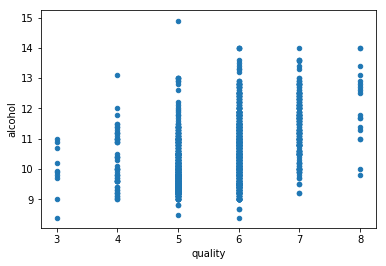

In [257]:
dframe_wine.plot(kind='scatter', x='quality', y='alcohol')

# <span style= 'color:lightgreen'>Splitting Applying and Combining</span>

In [258]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [259]:
def ranker(df):
    
    df['alc_content_rank'] = np.arange(len(df)) +1
    
    return df

In [261]:
dframe_wine.sort_values('alcohol', ascending=False, inplace=True)

In [262]:
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [264]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,2
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,0.428571,3


In [265]:
num_of_qual = dframe_wine['quality'].value_counts()

In [266]:
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [267]:
dframe_wine[dframe_wine.alc_content_rank == 1].head(len(num_of_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0.272727,1


# <span style= 'color:lightgreen'>Cross Tabulation</span>

In [269]:
! pip install StringIO

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', ConnectionResetError(104, 'Conexão fechada pela outra ponta'))': /simple/stringio/
  Could not find a version that satisfies the requirement StringIO (from versions: )
No matching distribution found for StringIO


In [273]:
from io import StringIO

In [274]:
data = """\
Sample Animal Intelligence
1 Dog Smart
2 Dog Smart
3 Cat Smartest
4 Cat Smartest
5 Dog Dumb
6 Cat Smart
"""

In [275]:
dframe13 = pd.read_table(StringIO(data),sep='\s+')

In [276]:
dframe13

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Smartest
3,4,Cat,Smartest
4,5,Dog,Dumb
5,6,Cat,Smart


In [278]:
pd.crosstab(dframe13.Animal, dframe13.Intelligence, margins=True)

Intelligence,Dumb,Smart,Smartest,All
Animal,,,,
Cat,0,1,2,3
Dog,1,2,0,3
All,1,3,2,6
